In [ ]:
import zipfile
import os
from google.colab import drive
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense
import pandas as pd

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/'My Drive'/10_food_classes_all_data.zip .

In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data/10_food_classes_all_data"

In [ ]:
food_list = os.listdir("10_food_classes_all_data/10_food_classes_all_data/train")
food_list.sort()
print(food_list)

['hamburger', 'ice_cream', 'pizza']


In [ ]:
!rm -r $'10_food_classes_all_data/10_food_classes_all_data/train/pizza'
!rm -r $'10_food_classes_all_data/10_food_classes_all_data/test/pizza'

In [ ]:
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

'''
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])'''


# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 126ms/step - loss: 0.5516 - accuracy: 0.7120 - val_loss: 0.5442 - val_accuracy: 0.7400
Epoch 2/10
47/47 [==============================] - 8s 166ms/step - loss: 0.5127 - accuracy: 0.7580 - val_loss: 0.6027 - val_accuracy: 0.6860
Epoch 3/10
47/47 [==============================] - 5s 115ms/step - loss: 0.4968 - accuracy: 0.7607 - val_loss: 0.5299 - val_accuracy: 0.7340
Epoch 4/10
47/47 [==============================] - 6s 118ms/step - loss: 0.4686 - accuracy: 0.7827 - val_loss: 0.5285 - val_accuracy: 0.7380
Epoch 5/10
47/47 [==============================] - 6s 117ms/step - loss: 0.4381 - accuracy: 0.7973 - val_loss: 0.5235 - val_accuracy: 0.7540
Epoch 6/10
47/47 [==============================] - 6s 136ms/step - loss: 0.3912 - accuracy: 0.8373 - val_loss: 0.5381 - val_accuracy: 0.7320
Epoch 7/10
47/47 [==============================] - 7s 154ms/step - loss: 0.3512 - accuracy: 0.8507 - val_loss: 0.5387 - val_accuracy: 0.7460
Epoch 

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

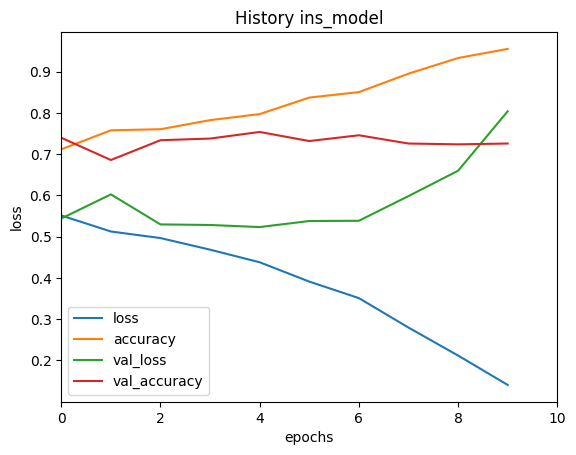

In [ ]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,10))